In [3]:
import pandas as pd

In [27]:
df = pd.read_csv("/Users/hamadbinmohammed/labs/Seaborn-Lab1/titanic.csv")

In [29]:
df.shape

(891, 15)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


## Data Description

- Survival : 0 = No, 1 = Yes
- pclass(Ticket Class) : 1 = 1st, 2 = 2nd, 3 = 3rd
- Sex(Gender) : Male, Female
- Age : Age in years
- SibSp : Number of siblings/spouses abroad the titanic
- Parch : Number of parents/children abrod the titanic
- Ticket : Ticket Number
- Fare : Passenger fare
- Cabin : Cabin Number
- Embarked : Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

# Q1: Print first and last rows from the dataset

In [31]:
# print the first row
print(df.head(1))

# print the last row
print(df.tail(1))

   survived  pclass   sex   age  sibsp  parch  fare embarked  class  who  \
0         0       3  male  22.0      1      0  7.25        S  Third  man   

   adult_male deck  embark_town alive  alone  
0        True  NaN  Southampton    no  False  
     survived  pclass   sex   age  sibsp  parch  fare embarked  class  who  \
890         0       3  male  32.0      0      0  7.75        Q  Third  man   

     adult_male deck embark_town alive  alone  
890        True  NaN  Queenstown    no   True  


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


# Q2: Select only survived people

In [55]:
# select rows where the person survived
df[['survived']]

,survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


# Q3: Select sex, fare, survived columns

In [54]:
df[['sex','fare','survived']]

,sex,fare,survived
0,male,7.2500,0
1,female,71.2833,1
2,female,7.9250,1
3,female,53.1000,1
4,male,8.0500,0
...,...,...,...
886,male,13.0000,0
887,female,30.0000,1
888,female,23.4500,0
889,male,30.0000,1


# Q4: Add a new_column to a DataFrame that combines class and embark_town

In [63]:
# add a new column to a DataFrame
df['new'] = df['class'] + ['embark_town']
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Class_Town,new
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,Second_Southampton,Secondembark_town
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,First_Southampton,Firstembark_town
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,Third_Southampton,Thirdembark_town
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,First_Cherbourg,Firstembark_town
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,Third_Queenstown,Thirdembark_town


# Q5: Remove new_column from the DataFrame

In [64]:
# remove this column from the DataFrame
# rows(axis=0), columns(axis=1) 
# inplace = False (default), inplace=True (change original DataFrame)
df.drop('new', axis=1, inplace=True)
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Class_Town
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,Second_Southampton
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,First_Southampton
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,Third_Southampton
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,First_Cherbourg
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,Third_Queenstown


# Q6: Filter DataFrame for rows of survived Males only 

In [67]:
df = df.append({'sex': 'male'}, ignore_index=True)
df.tail()

/var/folders/_d/2rnz5lxd0g73bjc7h0_4g7bw0000gn/T/ipykernel_6966/2814077285.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'sex': 'male'}, ignore_index=True)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Class_Town
887,1.0,1.0,female,19.0,0.0,0.0,30.00,S,First,woman,False,B,Southampton,yes,True,First_Southampton
888,0.0,3.0,female,NaN,1.0,2.0,23.45,S,Third,woman,False,NaN,Southampton,no,False,Third_Southampton
889,1.0,1.0,male,26.0,0.0,0.0,30.00,C,First,man,True,C,Cherbourg,yes,True,First_Cherbourg
890,0.0,3.0,male,32.0,0.0,0.0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,Third_Queenstown
891,NaN,NaN,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,age,class
17,NaN,Second
21,34.0,Second
23,28.0,First
36,NaN,Third
55,NaN,First
...,...,...
838,32.0,Third
839,NaN,First
857,51.0,First
869,4.0,Third


# Q7: The total number of males who survived 

In [72]:
df.sort_values(by='alive', ascending=False, inplace=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Class_Town
446,1.0,2.0,female,13.0,0.0,1.0,19.500,S,Second,child,False,NaN,Southampton,yes,False,Second_Southampton
612,1.0,3.0,female,NaN,1.0,0.0,15.500,Q,Third,woman,False,NaN,Queenstown,yes,False,Third_Queenstown
649,1.0,3.0,female,23.0,0.0,0.0,7.550,S,Third,woman,False,NaN,Southampton,yes,True,Third_Southampton
600,1.0,2.0,female,24.0,2.0,1.0,27.000,S,Second,woman,False,NaN,Southampton,yes,False,Second_Southampton
414,1.0,3.0,male,44.0,0.0,0.0,7.925,S,Third,man,True,NaN,Southampton,yes,True,Third_Southampton


# Q8: How many values in each class?

In [85]:
#i have an issue with viewing the numbers classes
group = df[['class']].groupby('class').mean()
group.head()

""
class
First
Second
Third


# Import Seaborn

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
sns.set()

# Q9: Draw barplot represents survived people based on sex

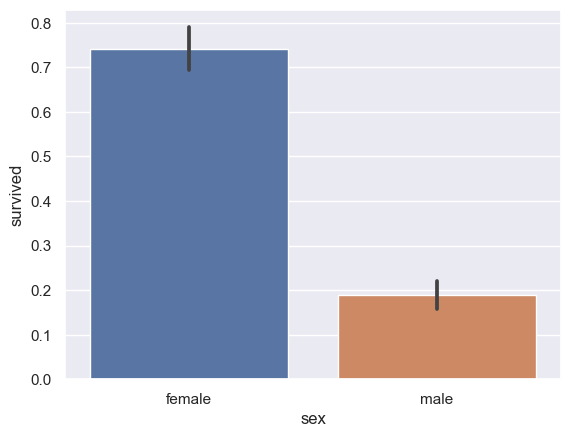

In [88]:
sns.barplot(x='sex', y='survived',data=df); # it shows the average 

# Q10: Draw catplot represents survived people based on embarked

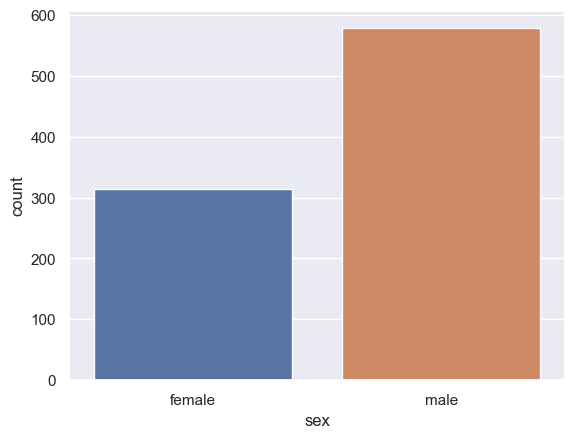

In [89]:
sns.countplot(x='sex', data=df); # it shows the count 

# Q11: Draw boxplot represents distribution of male and female based on age and pclass

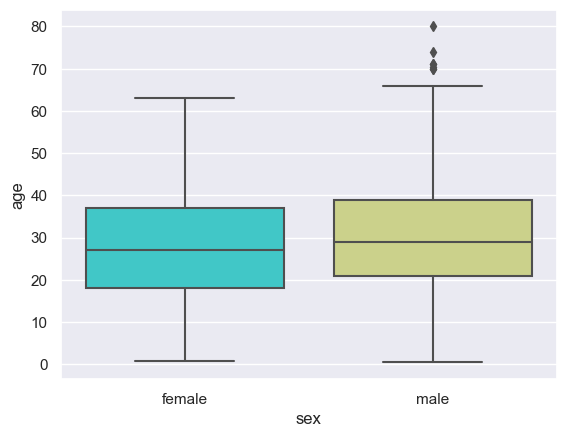

In [90]:
sns.boxplot(x="sex", y="age", data=df, palette='rainbow');

# Q12: Draw heatmap represents correlations between sibsp, parch, age, fare, and survived columns

<AxesSubplot:>

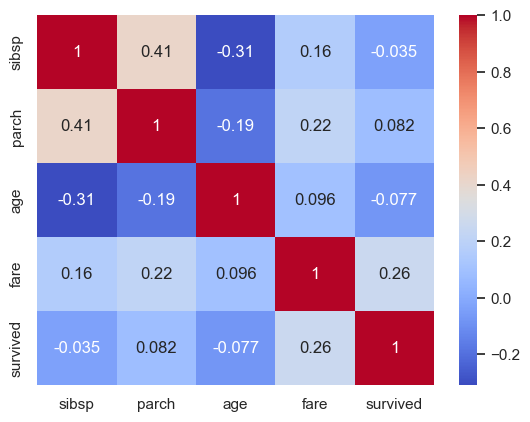

In [91]:
# Select the columns 
cols = ['sibsp', 'parch', 'age', 'fare', 'survived']
data = df[cols]

# Compute the correlation matrix
corr = data.corr()

# Plot the heatmap
sns.heatmap(corr, cmap='coolwarm', annot=True)

# Q13: Draw factorplot represents the relation between sibsp and survived columns

/Users/hamadbinmohammed/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


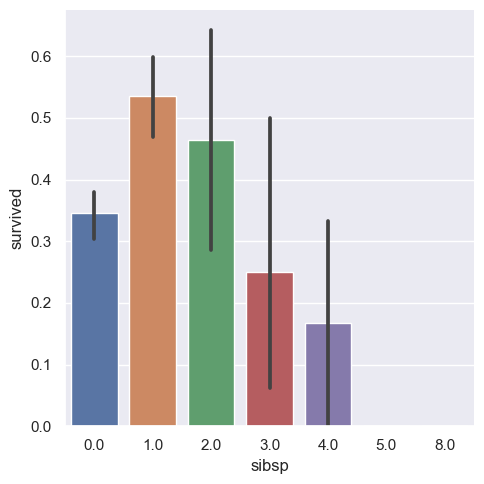

In [92]:
# Plot the factorplot
sns.factorplot(x='sibsp', y='survived', data=df, kind='bar')

# Show the plot
plt.show()

# Q14: Draw extra insights [Optional]

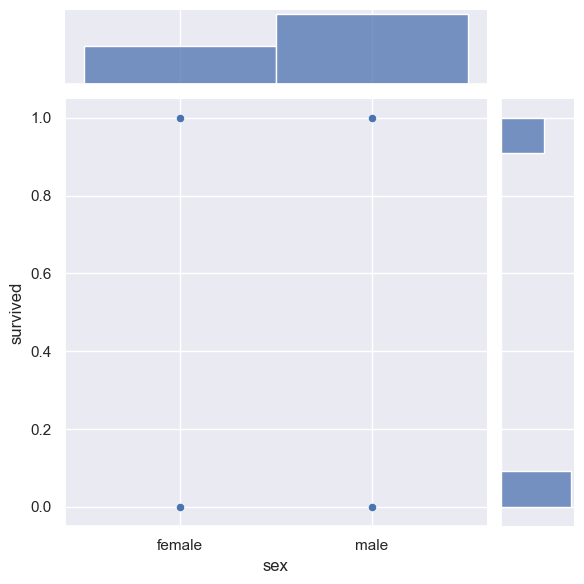

In [95]:
sns.jointplot(x='sex', y='survived',data=df, kind='scatter');